In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\ducat training\\Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df['Customer ID'].duplicated().sum()



np.int64(9201)

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df['order_date'] = df['Order Date'].str.split('/').str[1]
df['order_month'] = df['Order Date'].str.split('/').str[0]
df['order_year'] = df['Order Date'].str.split('/').str[2]

In [8]:
df['order_date'] = df['order_date'].astype(int)
df['order_month'] = df['order_month'].astype(int)
df['order_year'] = df['order_year'].astype(int)

In [9]:
df.drop('Order Date',axis = 1 , inplace = True)

In [10]:
df['ship_date'] = df['Ship Date'].str.split('/').str[0]
df['ship_month'] = df['Ship Date'].str.split('/').str[1]
df['ship_year'] = df['Ship Date'].str.split('/').str[2]

In [11]:
df['ship_date'] = df['ship_date'].astype(int)
df['ship_month'] = df['ship_month'].astype(int)
df['ship_year'] = df['ship_year'].astype(int)

In [12]:
df.drop('Ship Date', axis = 1, inplace = True)

# Which customer made most purchase?

In [13]:
df['Customer ID'].value_counts().head(10)


Customer ID
WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
SV-20365    32
JD-15895    32
EH-13765    32
ZC-21910    31
EP-13915    31
Name: count, dtype: int64

# Which customers generated the most revenue?

In [14]:
df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(5)

Customer ID
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
Name: Sales, dtype: float64

# Did some customers buy frequently across many months or years?

In [15]:
df.groupby('Customer ID')['order_year'].nunique().sort_values(ascending=False)

Customer ID
AA-10315    4
NW-18400    4
ES-14080    4
ES-14020    4
NZ-18565    4
           ..
JC-15385    1
TM-21490    1
AR-10570    1
AO-10810    1
TC-21145    1
Name: order_year, Length: 793, dtype: int64

# What’s the most common sub-category each top customer buys?


In [16]:
df.groupby(['Customer ID', 'Sub-Category']).size().unstack(fill_value=0)


Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Customer ID,,,,,,,,,,,,,,,,,
AA-10315,1,2,0,2,0,0,0,0,1,1,0,0,1,1,1,1,0
AA-10375,2,0,1,4,0,0,0,0,0,1,0,0,4,1,2,0,0
AA-10480,1,0,1,0,0,0,0,0,0,1,0,0,5,1,2,0,1
AA-10645,0,0,1,1,1,3,0,1,0,4,0,0,2,2,3,0,0
AB-10015,0,0,1,0,1,1,0,0,0,0,0,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP-21865,3,2,4,4,0,0,0,1,1,4,0,0,7,0,2,0,0
YC-21895,0,0,1,0,0,0,1,0,0,1,0,0,2,1,2,0,0
YS-21880,1,0,1,2,0,1,0,1,0,1,0,0,0,0,4,0,1


# Do some customers buy in same month every year (e.g. Diwali spike)?

In [17]:
df.groupby(['Customer ID', 'order_month']).size().unstack(fill_value = 0)


order_month,1,2,3,4,5,6,7,8,9,10,11,12
Customer ID,,,,,,,,,,,,
AA-10315,0,0,6,0,0,2,0,0,2,1,0,0
AA-10375,0,2,0,1,1,0,1,0,2,1,4,3
AA-10480,0,0,0,1,1,0,5,5,0,0,0,0
AA-10645,0,0,0,0,0,3,4,0,4,0,4,3
AB-10015,0,1,3,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
XP-21865,8,0,0,0,0,0,0,1,1,4,11,3
YC-21895,0,0,0,1,0,0,0,0,2,0,4,1
YS-21880,1,0,0,1,1,0,3,3,0,0,0,3


# Which is the Height Selling Item in each category?

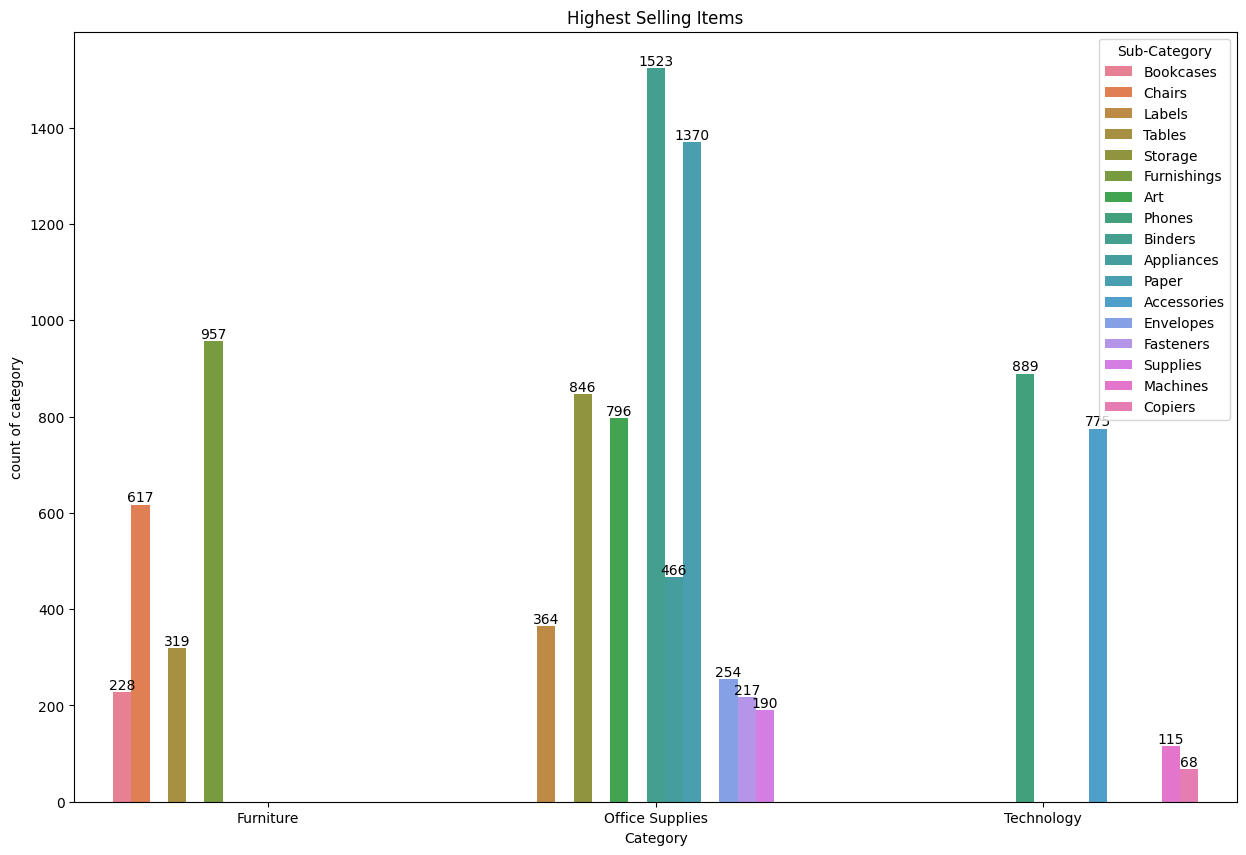

In [18]:
plt.figure(figsize = (15,10))
ax = sns.countplot(x = 'Category', data = df, hue= 'Sub-Category')

for container in ax.containers:
    ax.bar_label(container)

    
plt.xlabel('Category')
plt.ylabel('count of category')
plt.title('Highest Selling Items')
plt.show()

# What are the top-selling categories?

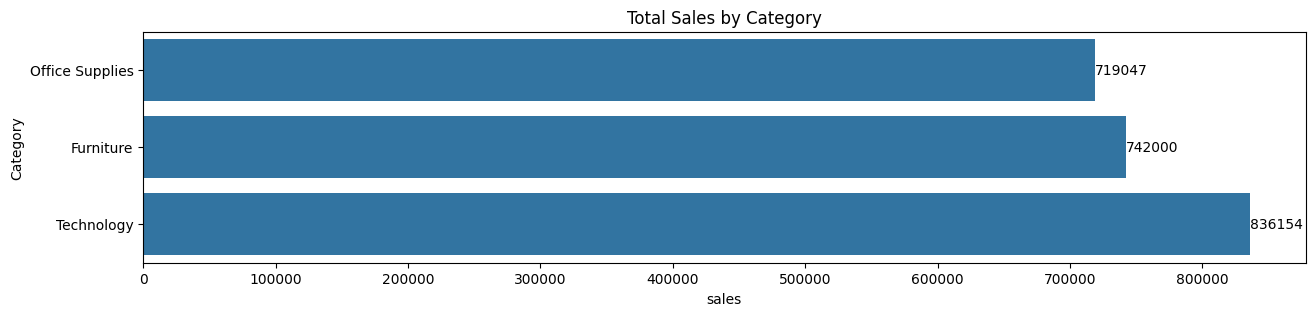

In [19]:
plt.figure(figsize =(15,3))
category_sales = df.groupby('Category')['Sales'].sum().sort_values()
ax= sns.barplot(x = category_sales.values, y = category_sales.index)
ax.bar_label(ax.containers[0])
plt.title('Total Sales by Category')
plt.xlabel('sales')
plt.show()

# In which months do we sell the most? (seasonality check)

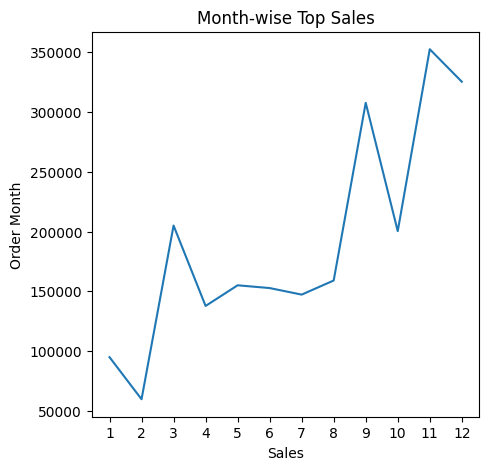

In [20]:
plt.figure(figsize = (5,5))
monthly_sales = df.groupby('order_month')['Sales'].sum().sort_values()
sns.lineplot(x= monthly_sales.index, y= monthly_sales.values)
plt.title('Month-wise Top Sales')
plt.xticks(ticks = range(1,13))
plt.xlabel('Sales')
plt.ylabel('Order Month')
plt.show()

In [21]:
df.head(2)

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Sales,Quantity,Discount,Profit,order_date,order_month,order_year,ship_date,ship_month,ship_year
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,261.96,2,0.0,41.9136,8,11,2016,11,11,2016
1,2,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,731.94,3,0.0,219.5820,8,11,2016,11,11,2016


In [22]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [23]:
df['order_year'].unique()

array([2016, 2015, 2014, 2017])

 # Which Segment is most Profitable?

Text(0.5, 1.0, 'Profit Distribution by Segment')

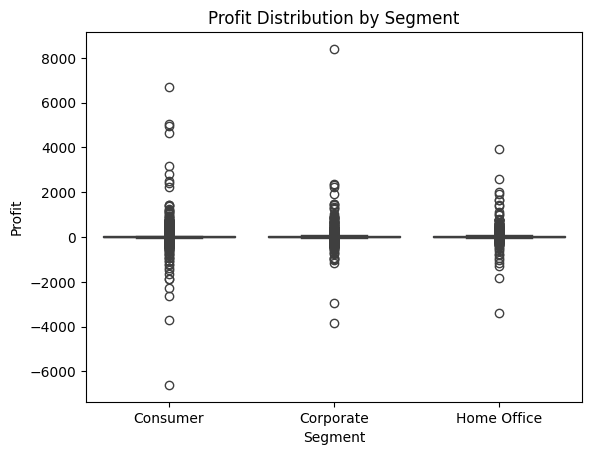

In [24]:
sns.boxplot(data = df , x= "Segment", y= "Profit")
plt.title("Profit Distribution by Segment")

# Relationship between Discount and Profit?

Text(0.5, 1.0, 'Discount V/S Profit')

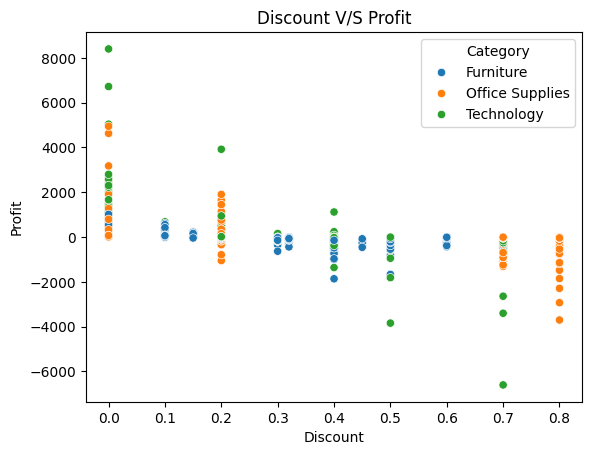

In [25]:
sns.scatterplot(data = df , x = 'Discount', y = 'Profit', hue = 'Category')
plt.title("Discount V/S Profit")

# Top 10 Products by Sales

Text(0.5, 1.0, 'Top 10 Product Sales')

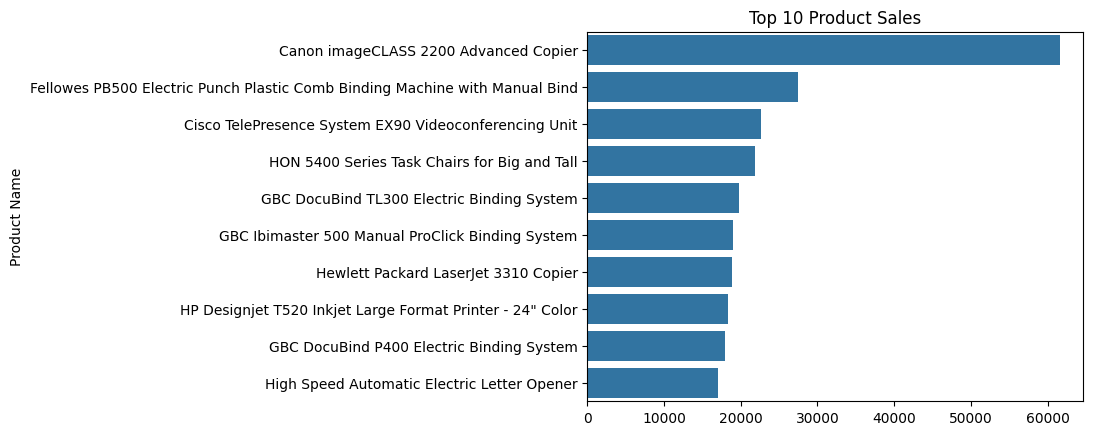

In [26]:
top_product = df.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).head(10)
sns.barplot(x= top_product.values,y= top_product.index)
plt.title("Top 10 Product Sales")

# Region-wise Sales or Profit

Text(0.5, 1.0, 'Region-wise Sales or Profit')

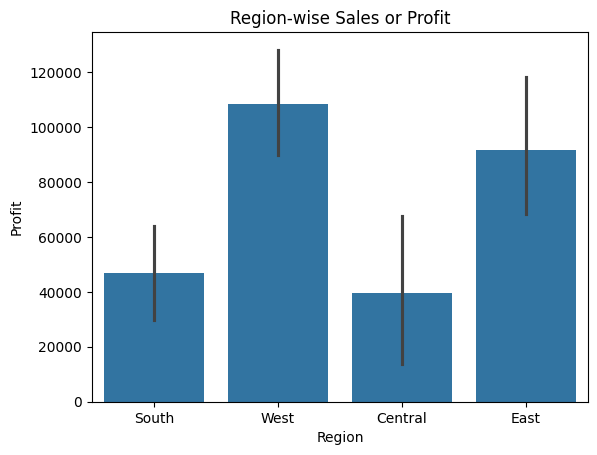

In [27]:
sns.barplot(data= df, x = 'Region', y = 'Profit', estimator = sum )
plt.title("Region-wise Sales or Profit")

# Heatmap of Sales by Month and Year

<Axes: xlabel='order_month', ylabel='order_year'>

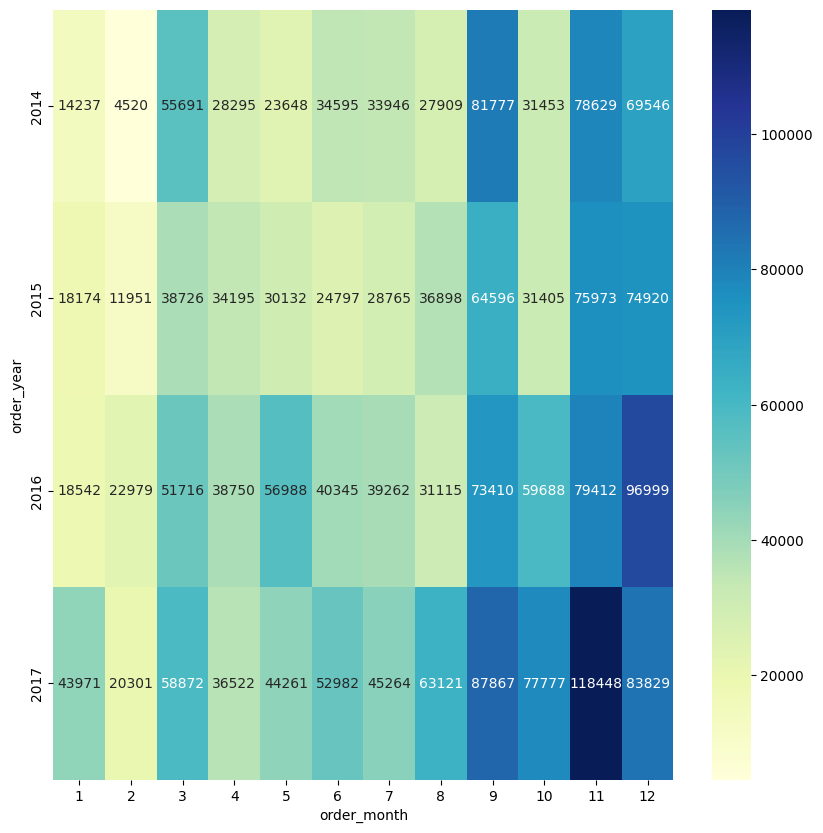

In [28]:
pivot = df.pivot_table(index= "order_year", columns = 'order_month', values= 'Sales', aggfunc= 'sum')
plt.figure(figsize = (10,10))
sns.heatmap(pivot,annot=True,fmt='.0f',cmap='YlGnBu')

# Top 5 loyal customers (most orders)

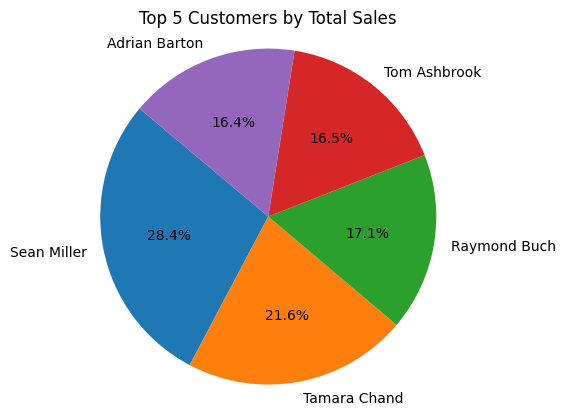

In [29]:
top_five = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False).head()
plt.pie(top_five.values, labels= top_five.index,autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Customers by Total Sales')
plt.axis('equal')  # Keeps the pie circle-shaped
plt.show()

# Find sub-categories with negative total profit

In [30]:
df.groupby('Sub-Category')['Profit'].sum().sort_values()

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26590.1663
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64

In [ ]:
"""

📌 Final Conclusion & Recommendations

- **High Discount ≠ High Profit**: High discounts in Furniture and Technology often reduce profits.
- **Segment Focus**: The Consumer segment generates more profit than Home Office — targeted marketing can help.
- **State-Level Strategy**: States like Texas and Ohio show losses despite high sales — pricing or logistic issues should be analyzed.
- **Product Optimization**: Sub-categories like Binders and Tables may need review due to low profitability.

Retail strategy should focus on improving profit margins while maintaining strong sales in high-performing categories and regions.


"""
